In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [14]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

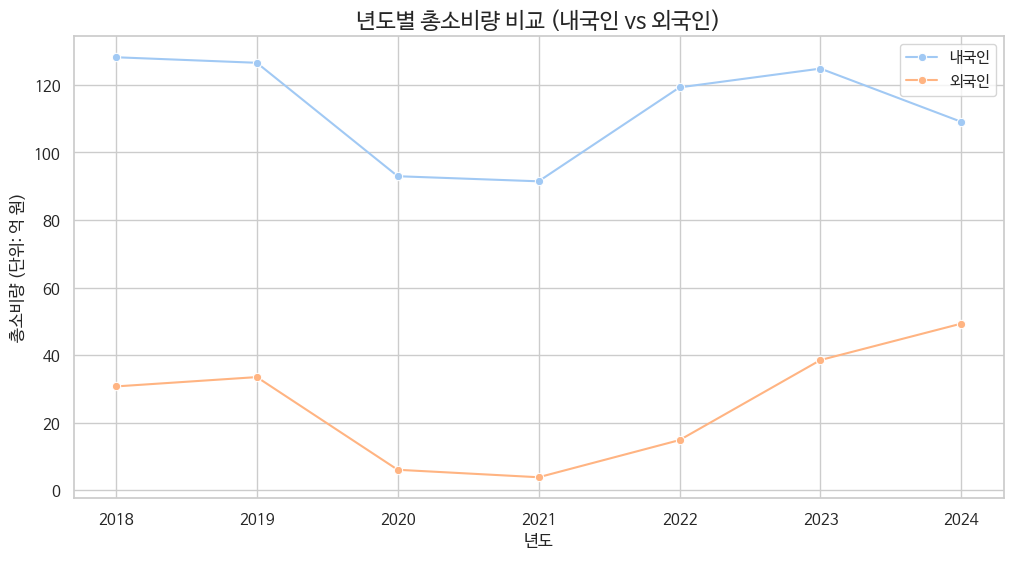

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = '/content/최종_병합된_데이터.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환하고 '년도'와 '월' 열 생성
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')
data['년도'] = data['기준년월'].dt.year
data['월'] = data['기준년월'].dt.month

# 내국인/외국인으로 데이터를 나눔
data_domestic = data[data['구분'] == '내국인']
data_foreign = data[data['구분'] == '외국인']

# 전년도 11월과 12월 데이터 추출
previous_year_nov_dec_domestic = data_domestic[(data_domestic['년도'] == 2023) & (data_domestic['월'].isin([11, 12]))]
previous_year_nov_dec_foreign = data_foreign[(data_foreign['년도'] == 2023) & (data_foreign['월'].isin([11, 12]))]

# 2024년 11월, 12월 데이터를 생성 (2023년 데이터의 합계를 이용)
nov_dec_2024_domestic = previous_year_nov_dec_domestic.copy()
nov_dec_2024_foreign = previous_year_nov_dec_foreign.copy()

nov_dec_2024_domestic['년도'] = 2024
nov_dec_2024_foreign['년도'] = 2024

# 2024 데이터를 원래 데이터에 추가
data_domestic = pd.concat([data_domestic, nov_dec_2024_domestic])
data_foreign = pd.concat([data_foreign, nov_dec_2024_foreign])

# 연도별 관광 총소비 합계 계산
domestic_total = data_domestic.groupby('년도')['관광총소비'].sum().reset_index()
foreign_total = data_foreign.groupby('년도')['관광총소비'].sum().reset_index()

# 단위를 억 원으로 변환
domestic_total['관광총소비'] /= 1e8
foreign_total['관광총소비'] /= 1e8

# 시각화
plt.figure(figsize=(12, 6))

# 내국인 기준 시각화
sns.lineplot(data=domestic_total, x='년도', y='관광총소비', label='내국인', marker='o')

# 외국인 기준 시각화
sns.lineplot(data=foreign_total, x='년도', y='관광총소비', label='외국인', marker='o')

plt.title('년도별 총소비량 비교 (내국인 vs 외국인)', fontsize=16)
plt.xlabel('년도', fontsize=12)
plt.ylabel('총소비량 (단위: 억 원)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-23-8d28ecde089d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sums_df, x='총소비금액', y='카테고리', palette='viridis')


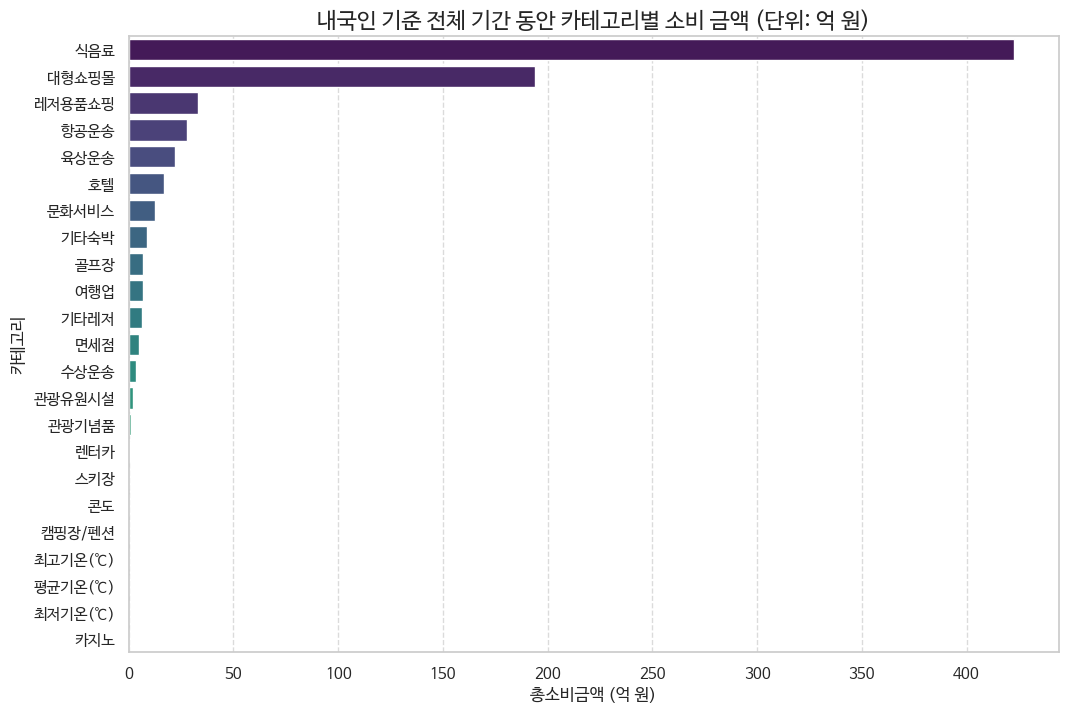

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (Colab에 맞게 파일 경로를 수정하세요)
file_path = '/content/최종_병합된_데이터.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환하고 '년도'와 '월' 열 생성
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')
data['년도'] = data['기준년월'].dt.year
data['월'] = data['기준년월'].dt.month

# 내국인 데이터만 필터링
data_domestic = data[data['구분'] == '내국인']

# 각 카테고리별로 합산 (관광총소비를 제외한 나머지 수치형 열을 합산)
categories = data_domestic.drop(columns=['기준년월', '구분', '년도', '월', '관광총소비', '방문자수'])
category_sums = categories.sum().sort_values(ascending=False)

# 데이터프레임으로 변환 (시각화를 위해)
category_sums_df = category_sums.reset_index()
category_sums_df.columns = ['카테고리', '총소비금액']

# 단위를 억 원으로 변환
category_sums_df['총소비금액'] /= 1e8

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=category_sums_df, x='총소비금액', y='카테고리', palette='viridis')
plt.title('내국인 기준 전체 기간 동안 카테고리별 소비 금액 (단위: 억 원)', fontsize=16)
plt.xlabel('총소비금액 (억 원)', fontsize=12)
plt.ylabel('카테고리', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-24-7c7877fc3361>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sums_df, x='총소비금액', y='카테고리', palette='viridis')


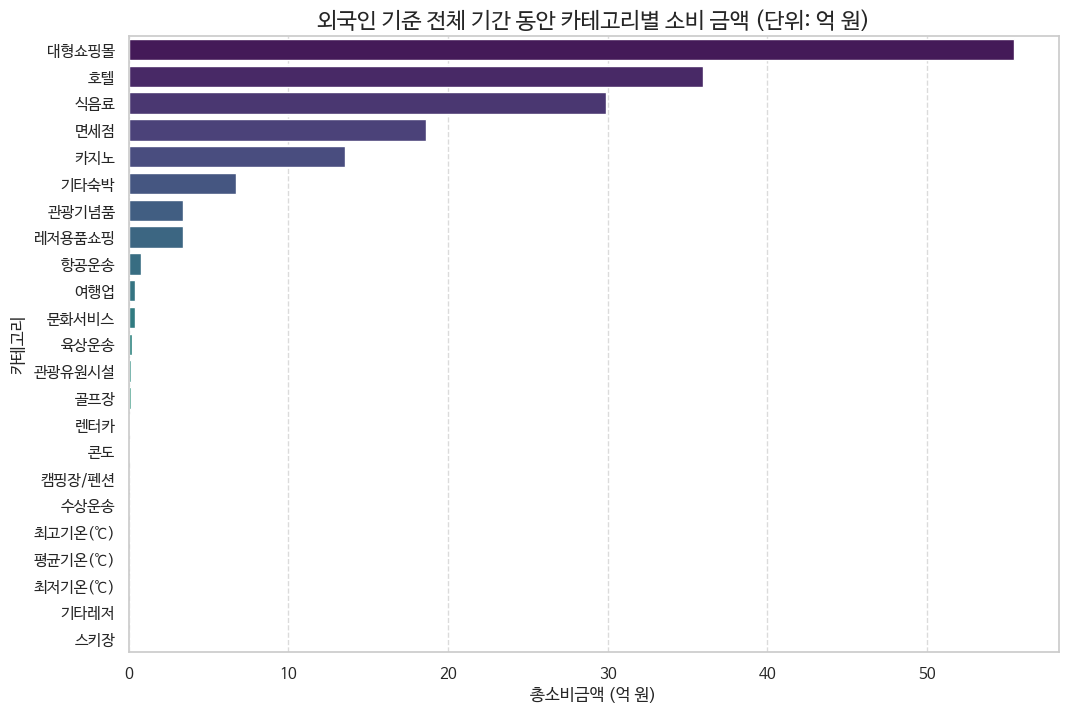

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (Colab에 맞게 파일 경로를 수정하세요)
file_path = '/content/최종_병합된_데이터.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환하고 '년도'와 '월' 열 생성
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')
data['년도'] = data['기준년월'].dt.year
data['월'] = data['기준년월'].dt.month

# 외국인 데이터만 필터링
data_foreign = data[data['구분'] == '외국인']

# 각 카테고리별로 합산 (관광총소비를 제외한 나머지 수치형 열을 합산)
categories = data_foreign.drop(columns=['기준년월', '구분', '년도', '월', '관광총소비', '방문자수'])
category_sums = categories.sum().sort_values(ascending=False)

# 데이터프레임으로 변환 (시각화를 위해)
category_sums_df = category_sums.reset_index()
category_sums_df.columns = ['카테고리', '총소비금액']

# 단위를 억 원으로 변환
category_sums_df['총소비금액'] /= 1e8

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=category_sums_df, x='총소비금액', y='카테고리', palette='viridis')
plt.title('외국인 기준 전체 기간 동안 카테고리별 소비 금액 (단위: 억 원)', fontsize=16)
plt.xlabel('총소비금액 (억 원)', fontsize=12)
plt.ylabel('카테고리', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
